In [1]:
#import data
import pandas as pd

def import_data(streaming_service):
    credit_path = './project_data/%s/credits.csv' % (streaming_service)
    titles_path = './project_data/%s/titles.csv' % (streaming_service)
    return pd.read_csv(credit_path), pd.read_csv(titles_path)
    
amazon_cast_data, amazon_title_data = import_data('amazon')
disney_cast_data, disney_title_data = import_data('disney')
HBO_cast_data, HBO_title_data = import_data('hbo')
hulu_cast_data, hulu_title_data = import_data('hulu')
netflix_cast_data, netflix_title_data = import_data('netflix')

In [2]:
#add streaming service column
def add_service_cols(service, data):
    df = pd.DataFrame(data)
    if service == 'amazon':
        on_amazon = 'yes'
    else:
        on_amazon = 'no'
    if service == 'disney':
        on_disney = 'yes'
    else:
        on_disney = 'no'
    if service == 'HBO':
        on_HBO = 'yes'
    else:
        on_HBO = 'no'
    if service == 'hulu':
        on_hulu = 'yes'
    else:
        on_hulu = 'no'
    if service == 'netflix':
        on_netflix = 'yes'
    else:
        on_netflix = 'no'
    df['amazon'] = on_amazon
    df['disney'] = on_disney
    df['HBO'] = on_HBO
    df['hulu'] = on_hulu
    df['netflix'] = on_netflix
    
add_service_cols('amazon', amazon_cast_data)
add_service_cols('amazon', amazon_title_data)
add_service_cols('disney', disney_cast_data)
add_service_cols('disney', disney_title_data)
add_service_cols('HBO', HBO_cast_data)
add_service_cols('HBO', HBO_title_data)
add_service_cols('hulu', hulu_cast_data)
add_service_cols('hulu', hulu_title_data)
add_service_cols('netflix', netflix_cast_data)
add_service_cols('netflix', netflix_title_data)
cast_data = pd.concat([amazon_cast_data, disney_cast_data, HBO_cast_data, hulu_cast_data, netflix_cast_data])
title_data = pd.concat([amazon_title_data, disney_title_data, HBO_title_data, hulu_title_data, netflix_title_data])
cast_data = cast_data.sort_values('person_id')
title_data = title_data.sort_values('id')

In [3]:
#display(cast_data)

In [15]:
#display(title_data)

In [23]:
#get paired intersections between services
def title_intersection(service1, service2):
    titles1 = set(service1['id'])
    titles2 = set(service2['id'])
    return list(titles1.intersection(titles2))

netflix_HBO_intersect = title_intersection(netflix_title_data, HBO_title_data)
netflix_amazon_intersect = title_intersection(netflix_title_data, amazon_title_data)
netflix_disney_intersect = title_intersection(netflix_title_data, disney_title_data)
netflix_hulu_intersect = title_intersection(netflix_title_data, hulu_title_data)
HBO_amazozn_intersect = title_intersection(HBO_title_data, amazon_title_data)
HBO_disney_intersect = title_intersection(HBO_title_data, disney_title_data)
HBO_hulu_intersect = title_intersection(HBO_title_data, hulu_title_data, )
amazon_disney_intersect = title_intersection(amazon_title_data, disney_title_data)
amazon_hulu_intersect = title_intersection(amazon_title_data, hulu_title_data)
hulu_disney_intersect = title_intersection(hulu_title_data, disney_title_data)

In [24]:
#get number values of intersections
intersection_nums = [len(netflix_HBO_intersect), len(netflix_amazon_intersect), len(netflix_disney_intersect), 
                     len(netflix_hulu_intersect), len(HBO_amazozn_intersect), len(HBO_disney_intersect), 
                     len(HBO_hulu_intersect), len(amazon_disney_intersect), len(amazon_hulu_intersect),
                     len(hulu_disney_intersect)]
#labels
intersection_names = ['netflix&HBO', 'netflix&amazon', 'netflix&disney', 'netflix&hulu', 'HBO&amazozn', 'HBO&disney',
                      'HBO&hulu', 'amazon&disney', 'amazon&hulu', 'hulu&disney']

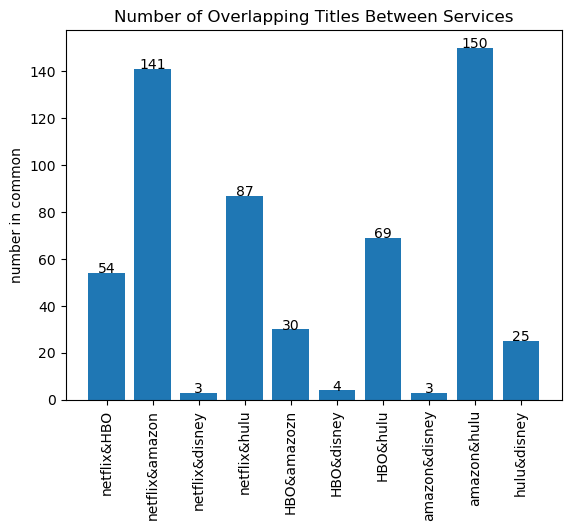

In [25]:
#intersection bar graph
import matplotlib.pyplot as plt
plt.bar(intersection_names, intersection_nums)
plt.xticks(rotation=90)
plt.ylabel("number in common")
plt.title("Number of Overlapping Titles Between Services")
for index, value in enumerate(intersection_nums):
    plt.text(index, value, str(value), ha = 'center')
plt.show()

In [26]:
#get common title names between each intersection
def common_titles(intersect_ids, one_service_title_data):
    titles = pd.DataFrame()
    for value in intersect_ids:
        titles = pd.concat([titles, one_service_title_data.loc[one_service_title_data['id'] == value]])
    return list(titles['title'])

netflix_HBO_ct = common_titles(netflix_HBO_intersect, HBO_title_data)
netflix_amazon_ct = common_titles(netflix_amazon_intersect, amazon_title_data)
netflix_disney_ct = common_titles(netflix_disney_intersect, disney_title_data)
netflix_hulu_ct = common_titles(netflix_hulu_intersect, hulu_title_data)
HBO_amazozn_ct = common_titles(HBO_amazozn_intersect, amazon_title_data)
HBO_disney_ct = common_titles(HBO_disney_intersect, disney_title_data)
HBO_hulu_ct = common_titles(HBO_hulu_intersect, hulu_title_data, )
amazon_disney_ct = common_titles(amazon_disney_intersect, disney_title_data)
amazon_hulu_ct = common_titles(amazon_hulu_intersect, hulu_title_data)
hulu_disney_ct = common_titles(hulu_disney_intersect, disney_title_data)

common_titles = [netflix_HBO_ct, netflix_amazon_ct, netflix_disney_ct, netflix_hulu_ct, HBO_amazozn_ct, HBO_disney_ct,
                HBO_hulu_ct, amazon_disney_ct, amazon_hulu_ct, hulu_disney_ct]

In [33]:
#write each intersection of common titles to a text file
def write_file(common_titles, service_names):
    file_name = service_names + '_common_titles.txt'
    common_titles.sort()
    with open (file_name, 'w') as file:  
        for title in common_titles:  
            file.write(title)  
            if title != common_titles[-1]:
                file.write('\n')  
    file.close()

for services in intersection_names:
    write_file(common_titles[intersection_names.index(services)], services)

In [27]:
#see if there are any titles in common between all five services - there were none
from operator import and_
from functools import reduce

services = [amazon_title_data, hulu_title_data, netflix_title_data, HBO_title_data, disney_title_data]
title_sets = []
for service in services:
    title_sets.append(set(service['id']))
all_titles_in_common = reduce(set.intersection, title_sets)
print(all_titles_in_common)
#no titles in all services

set()


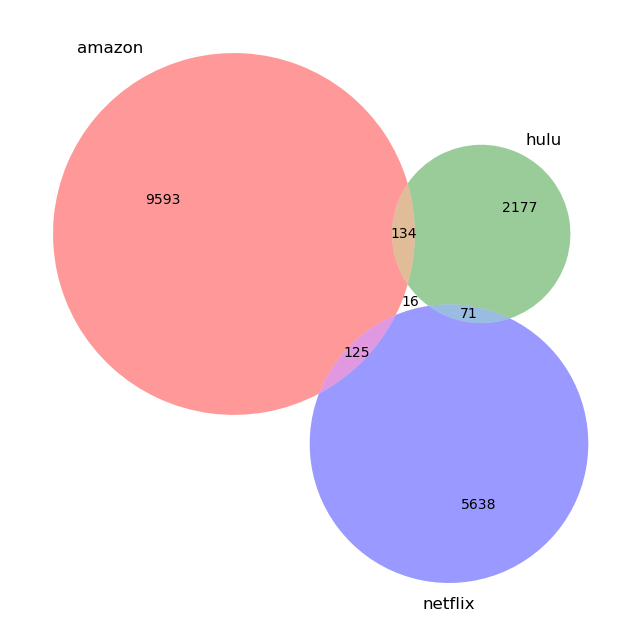

In [28]:
#creating venn diagrams of 3 services
import numpy as np
#to run: pip install matplotlib-venn
from matplotlib_venn import venn3, venn3_circles

labels = ['amazon', 'hulu', 'netflix']
fig, ax = plt.subplots(1, figsize=(12,8))
big3 = title_sets[:3]
venn3(big3, ax = ax, set_labels = labels)
plt.show()

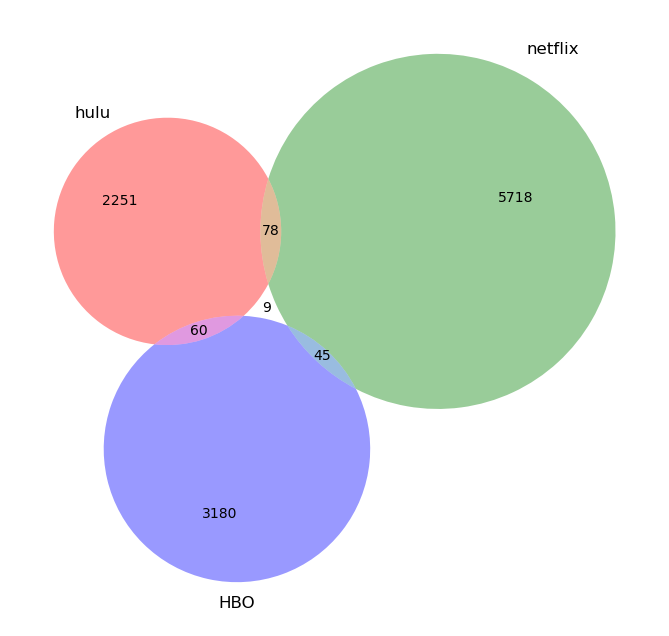

In [29]:
labels = ['hulu', 'netflix', 'HBO']
fig, ax = plt.subplots(1, figsize=(12,8))
HBO3 = title_sets[1:4]
venn3(HBO3, ax = ax, set_labels = labels)
plt.show()

In [31]:
#checking if inner number is the intersection between three services/find common titles
titles_in_common = reduce(set.intersection, HBO3)
print(len(titles_in_common))
titles_in_common = list(titles_in_common)
intersect_titles = pd.DataFrame()
for title in titles_in_common:
    intersect_titles = pd.concat([intersect_titles, netflix_title_data.loc[netflix_title_data['id'] == title]])
display(intersect_titles.sort_values('imdb_score', ascending = False))

9


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,amazon,disney,HBO,hulu,netflix
653,ts32835,Hunter x Hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,"['action', 'animation', 'comedy', 'fantasy']",['JP'],3.0,tt2098220,9.0,92162.0,178.265,8.800,no,no,no,no,yes
243,ts11313,DEATH NOTE,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,"['animation', 'thriller', 'scifi', 'drama', 'f...",['JP'],1.0,tt0877057,9.0,309445.0,120.545,8.664,no,no,no,no,yes
1211,ts42169,ERASED,SHOW,Satoru Fujinuma is a struggling manga artist w...,2016,TV-14,22,"['drama', 'thriller', 'animation', 'fantasy', ...",['JP'],1.0,tt5249462,8.5,44643.0,25.494,8.700,no,no,no,no,yes
3086,ts84633,The Promised Neverland,SHOW,"Surrounded by a forest and a gated entrance, t...",2019,TV-MA,23,"['animation', 'thriller', 'scifi', 'action', '...",['JP'],2.0,tt8788458,8.3,36018.0,42.367,8.843,no,no,no,no,yes
1129,ts35201,Food Wars! Shokugeki no Soma,SHOW,Yukihira Souma's dream is to become a full-tim...,2015,TV-MA,24,"['drama', 'comedy', 'fantasy', 'thriller', 'an...",['JP'],5.0,tt4731072,8.2,10022.0,28.642,8.600,no,no,no,no,yes
121,ts21034,InuYasha,SHOW,Kagome Higurashi is a modern day young girl wh...,2000,TV-14,25,"['scifi', 'action', 'fantasy', 'romance', 'ani...",['JP'],9.0,tt0290223,7.9,15823.0,62.355,8.600,no,no,no,no,yes
683,ts9246,Blue Exorcist,SHOW,"Humans live in the world of Assiah, demons in ...",2011,TV-14,25,"['scifi', 'action', 'fantasy', 'horror', 'fami...",['JP'],2.0,tt1799631,7.5,12985.0,46.557,8.100,no,no,no,no,yes
104,tm192037,Starship Troopers,MOVIE,"Set in the future, the story follows a young s...",1997,R,129,"['scifi', 'action', 'thriller']",['US'],NaN,tt0120201,7.3,291452.0,29.500,6.993,no,no,no,no,yes
726,ts191698,Little Baby Bum,SHOW,Little Baby Bum is a fun and educational show ...,2011,TV-Y,7,"['family', 'music', 'animation']",['GB'],4.0,tt10051854,6.4,94.0,0.971,10.000,no,no,no,no,yes


In [32]:
titles_in_common = reduce(set.intersection, big3)
print(len(titles_in_common))
titles_in_common = list(titles_in_common)
intersect_titles = pd.DataFrame()
for title in titles_in_common:
    intersect_titles = pd.concat([intersect_titles, netflix_title_data.loc[netflix_title_data['id'] == title]])
display(intersect_titles.sort_values('imdb_score', ascending = False))

16


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,amazon,disney,HBO,hulu,netflix
225,ts8308,Community,SHOW,Follow the lives of a group of students at wha...,2009,TV-PG,23,['comedy'],['US'],6.0,tt1439629,8.5,257221.0,42.357,8.000,no,no,no,no,yes
371,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,"['comedy', 'drama', 'romance']",['KR'],1.0,tt1370334,7.9,11902.0,80.384,8.280,no,no,no,no,yes
284,ts21197,Merlin,SHOW,"The unlikely friendship between Merlin, a youn...",2008,TV-PG,44,"['action', 'drama', 'scifi', 'fantasy', 'europ...",['GB'],5.0,tt1199099,7.9,80927.0,74.931,7.900,no,no,no,no,yes
91,ts20981,Survivor,SHOW,A reality show contest where sixteen or more c...,2000,TV-PG,48,['reality'],['US'],42.0,tt0239195,7.4,24687.0,54.190,7.400,no,no,no,no,yes
95,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,"['action', 'scifi', 'animation', 'comedy', 'fa...",['JP'],25.0,tt14053732,7.4,198.0,115.356,7.633,no,no,no,no,yes
381,ts20526,The Game,SHOW,When her boyfriend Derwin Davis is chosen as t...,2006,TV-14,22,"['drama', 'comedy', 'romance', 'sport']",['US'],10.0,tt0772137,6.6,4449.0,12.124,8.400,no,no,no,no,yes
726,ts191698,Little Baby Bum,SHOW,Little Baby Bum is a fun and educational show ...,2011,TV-Y,7,"['family', 'music', 'animation']",['GB'],4.0,tt10051854,6.4,94.0,0.971,10.000,no,no,no,no,yes
384,ts31593,Pororo the Little Penguin,SHOW,Fun adventures await in the forest named Poron...,2003,NaN,9,"['scifi', 'family', 'animation', 'action']",['KR'],7.0,tt3968668,6.3,91.0,4.404,5.000,no,no,no,no,yes
309,ts32186,Sonic X,SHOW,Sonic and his friends team up with 12 year old...,2003,TV-Y7,21,"['family', 'animation', 'action', 'comedy', 'd...",['JP'],3.0,tt0367413,6.2,4709.0,37.945,7.500,no,no,no,no,yes
158,ts21693,"Sister, Sister",SHOW,Twins Tia Landry and Tamera Campbell were sepa...,1994,TV-PG,22,"['comedy', 'drama', 'family']",['US'],6.0,tt0108927,6.2,12657.0,21.489,7.500,no,no,no,no,yes


In [14]:
#find the one in common title
services4 = title_sets[0:-1]
titles_in_common = reduce(set.intersection, services4)
print(list(titles_in_common)[0])
intersect_title = netflix_title_data.loc[netflix_title_data['id'] == 'ts191698']
display(intersect_title)

ts191698


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,amazon,disney,HBO,hulu,netflix
726,ts191698,Little Baby Bum,SHOW,Little Baby Bum is a fun and educational show ...,2011,TV-Y,7,"['family', 'music', 'animation']",['GB'],4.0,tt10051854,6.4,94.0,0.971,10.0,no,no,no,no,yes


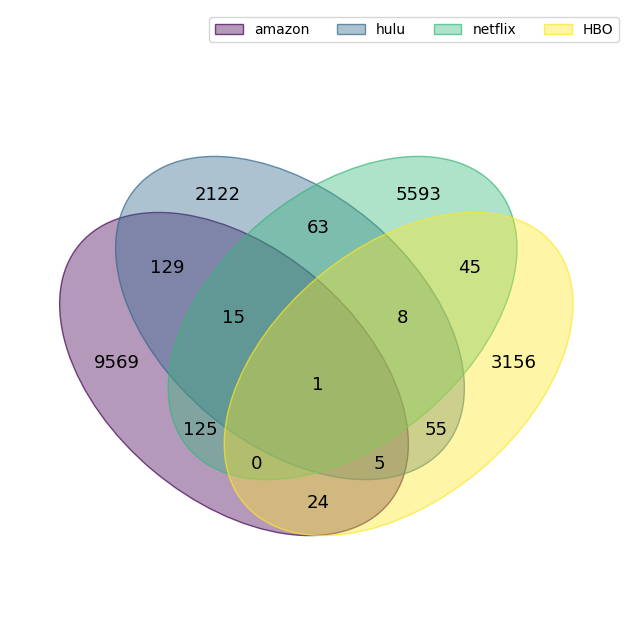

In [25]:
#creating venn diagrams of 4+ services
#to run: pip install venn
from venn import venn

labels = ['amazon', 'hulu', 'netflix', 'HBO']
main4 = {
    labels[0]: title_sets[0],
    labels[1]: title_sets[1],
    labels[2]: title_sets[2],
    labels[3]: title_sets[3]
}
fig, ax = plt.subplots(1, figsize=(12,8))
venn(main4, ax=ax)
plt.legend(labels, ncol=6)

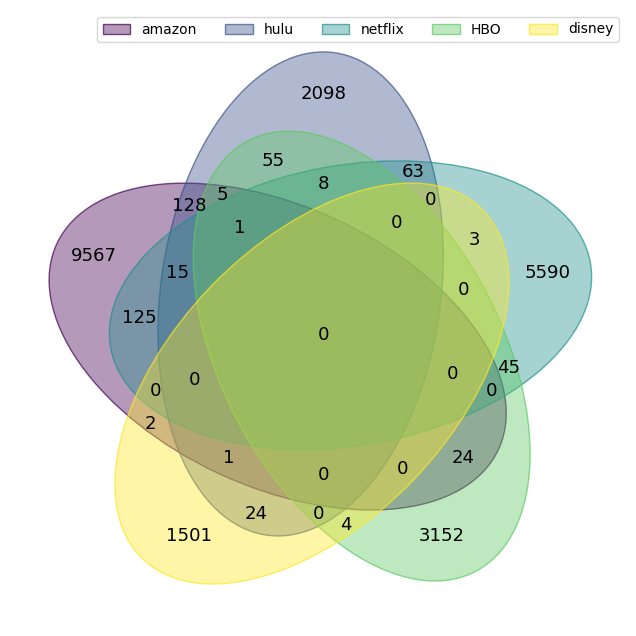

In [26]:
labels = ['amazon', 'hulu', 'netflix', 'HBO', 'disney']
all5 = {
    labels[0]: title_sets[0],
    labels[1]: title_sets[1],
    labels[2]: title_sets[2],
    labels[3]: title_sets[3],
    labels[4]: title_sets[4]
}
fig, ax = plt.subplots(1, figsize=(12,8))
venn(all5, ax=ax)
plt.legend(labels, ncol=6)

In [57]:
#looking at cast data for actors and directors under all services
services = [amazon_cast_data, hulu_cast_data, netflix_cast_data, HBO_cast_data, disney_cast_data]
cast_sets = []
for service in services:
    cast_sets.append(set(service['person_id']))
people_all_services = reduce(set.intersection, cast_sets)
names = pd.DataFrame()
for pid in people_all_services:
    query = 'person_id == ' + str(pid)
    names = pd.concat([names, cast_data.query(query)[['name', 'role']]])
    
actors = names.loc[names['role'] == 'ACTOR']
directors = names.loc[names['role'] == 'DIRECTOR']
actors = actors.drop_duplicates()
directors = directors.drop_duplicates()

In [94]:
#write actors names to txt file
actors = actors.sort_values('name')
with open ('actors_in_all_services.txt', 'w', encoding="utf-8") as file:  
    for row in actors.itertuples():         
        file.write(getattr(row, 'name'))  
        file.write('\n')  
file.close()

In [95]:
#write directors names to txt file
directors = directors.sort_values('name')
with open ('directors_in_all_services.txt', 'w', encoding="utf-8") as file:  
    for row in directors.itertuples():         
        file.write(getattr(row, 'name'))  
        file.write('\n')  
file.close()

In [18]:
#titles only on one service - alphabetical
unique = title_data.drop_duplicates(subset = 'title', keep = False)
display(unique.sort_values('title'))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,amazon,disney,HBO,hulu,netflix
2658,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,[],[],1.0,tt12635254,9.6,7.0,NaN,NaN,no,no,no,no,yes
3237,tm820190,#Alive,MOVIE,"As a grisly virus rampages a city, a lone man ...",2020,NaN,98,"['horror', 'thriller', 'action', 'drama']",['KR'],NaN,tt10620868,6.3,38313.0,58.967,7.3,no,no,no,no,yes
4095,tm817087,#AnneFrank. Parallel Stories,MOVIE,One single Anne Frank moves us more than the c...,2019,NaN,92,"['drama', 'history', 'documentation']",['IT'],NaN,tt9850370,6.5,1548.0,8.190,7.1,no,no,no,no,yes
2875,tm371188,#FriendButMarried,MOVIE,"Pining for his high school crush for years, a ...",2018,NaN,102,"['romance', 'comedy', 'drama']",['ID'],NaN,tt8076266,6.8,714.0,1.257,6.7,no,no,no,no,yes
4549,tm846354,#FriendButMarried 2,MOVIE,As Ayu and Ditto finally transition from best ...,2020,NaN,104,"['drama', 'comedy', 'romance']",['ID'],NaN,tt11640412,6.9,311.0,2.063,7.5,no,no,no,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5721,ts307816,냉면 랩소디,SHOW,"Refreshing and flavorful, naengmyeon is Korea’...",2021,TV-PG,49,['documentation'],['KR'],1.0,tt15772846,7.5,25.0,1.765,4.0,no,no,no,no,yes
4675,ts304136,마법버스 타요,SHOW,NaN,2020,TV-Y7,24,[],['KR'],1.0,NaN,NaN,NaN,0.600,NaN,no,no,no,no,yes
4429,ts62451,부릉! 부릉! 브루미즈,SHOW,A group of vehicular toys come alive to explor...,2012,TV-Y,11,"['animation', 'family']",['KR'],3.0,tt3964988,5.1,26.0,0.600,4.0,yes,no,no,no,no
4358,ts255867,뽀로로 동화나라,SHOW,NaN,2020,TV-Y,14,['animation'],['KR'],1.0,NaN,NaN,NaN,0.600,NaN,no,no,no,no,yes


In [20]:
#unique titles by imdb score
popular = unique.sort_values('imdb_score', ascending = False)
display(popular)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,amazon,disney,HBO,hulu,netflix
9135,tm1159926,Pawankhind,MOVIE,The story of the Maratha Warriors at the battl...,2022,NaN,153,"['action', 'drama', 'history']",['IN'],NaN,tt14448632,9.9,2036.0,3.812,8.5,yes,no,no,no,no
7783,ts231725,Water Helps the Blood Run,SHOW,"Five orphan girls from diverse backgrounds, ca...",2019,NaN,29,"['drama', 'comedy']",[],1.0,tt11524214,9.7,30.0,NaN,NaN,yes,no,no,no,no
1015,ts84270,Bluey,SHOW,Bluey is an inexhaustible six year-old Blue He...,2018,TV-Y,7,"['animation', 'family']",['AU'],3.0,tt7678620,9.7,6626.0,32.210,7.0,no,yes,no,no,no
2658,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,[],[],1.0,tt12635254,9.6,7.0,NaN,NaN,no,no,no,no,yes
751,ts17103,Battleground,SHOW,Battleground is a mockumentary comedy-drama te...,2012,NaN,26,"['war', 'drama', 'reality', 'comedy', 'documen...",['US'],1.0,tt0458249,9.5,12.0,1.756,9.3,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,ts98217,Baby u,SHOW,Class is in session! Join BabyU for all the ba...,2011,TV-Y,24,[],['US'],1.0,tt6963828,NaN,NaN,NaN,NaN,yes,no,no,no,no
3936,ts98222,Music and Sounds with Bonnie Bear,SHOW,"Together with her best friend, Mr. Gramophone,...",2006,TV-Y,26,[],[],1.0,tt6963174,NaN,NaN,NaN,NaN,yes,no,no,no,no
1230,ts98283,NASA Television Documentaries,SHOW,NASA's Vision: To reach for new heights and re...,2015,NaN,25,['documentation'],[],1.0,tt6958752,NaN,NaN,NaN,NaN,no,no,no,yes,no
360,ts98340,Metallica: Some Kind of Monster,SHOW,This collection includes the acclaimed rock do...,2004,TV-MA,84,['western'],"['CA', 'US']",1.0,tt6954486,NaN,NaN,0.893,NaN,no,no,no,no,yes
